In [1]:
import pandas as pd 
import matplotlib as plt
import csv
import json

In [2]:
redwine = pd.read_csv("data/winequality-red.csv")
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#I will avoid dropping duplicates for now because each instance is a variant of one Portuguese "Vinho Verde" wine. Since there is also no name or brand to distinguish it I am being careful 
#in avoiding erasing most of the data. 

In [4]:
# red_dict = redwine.to_dict('index')
# red_dict

In [5]:
# red_dict['fixed acidity; '] = red_dict['fixed acidity; '].str.extract(r'([a-z]+\d{3})')
# red_dict.head()
#tried using regex but kept producing errors. Decided to split the columns via excel. 

In [6]:
redwine['residual sugar'].max()

15.5

In [7]:
#The lowest sugar content is 0.9 which is shared between index 1018 and 1017. 
lowsugar = redwine[(redwine['residual sugar'] < 6)]
lowsugar.sort_values(by=['residual sugar'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1018,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
909,7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.5,6
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
914,7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
974,8.8,0.330,0.41,5.9,0.073,7.0,13.0,0.99658,3.30,0.62,12.1,7
40,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5


In [8]:
#The highest sugar content was index 480 with 15.5 closely followed by index 1434 and 1435 with a difference of 0.1
highsugar = redwine[(redwine['residual sugar'] > 7)]
highsugar.sort_values(by=['residual sugar'])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
164,7.3,0.590,0.26,7.2,0.070,35.0,121.0,0.99810,3.37,0.49,9.4,5
163,7.4,0.600,0.26,7.3,0.070,36.0,121.0,0.99820,3.37,0.49,9.4,5
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1186,6.6,0.800,0.03,7.8,0.079,6.0,12.0,0.99630,3.52,0.50,12.2,5
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
595,8.9,0.595,0.41,7.9,0.086,30.0,109.0,0.99980,3.27,0.57,9.3,5
1074,7.5,0.770,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,5
1071,7.5,0.770,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,5


In [9]:
#The Grading Scale was out of 10. Out of 1599, 744(46.5%) instances of the red wine can be discern as low quality. 5 can be viewed as standard but when viewed through the eyes of the consumer then a 
#a quality of 5 will be passable enough at best but will be viewed as bad. It can be assumed when given a choice and knowledge of the quality a consumer will choose the higher grade. 
#Unless it is clearly stated by a potential buyer that they care not for quality.  
lowquality = redwine[(redwine['quality'] <= 5)]
lowquality.sort_values(by=['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
519,7.3,0.365,0.49,2.50,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5
521,7.6,0.410,0.49,2.00,0.088,16.0,43.0,0.99800,3.48,0.64,9.1,5
522,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
461,8.3,0.615,0.22,2.60,0.087,6.0,19.0,0.99820,3.26,0.61,9.3,5


In [10]:
highquality = redwine[(redwine['quality'] >= 6)]
highquality.sort_values(by=['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
1072,7.2,0.35,0.26,1.8,0.083,33.0,75.0,0.99680,3.40,0.58,9.5,6
1073,8.0,0.62,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6
1076,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4,6
1080,10.3,0.27,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8


In [11]:
#the quality rating of 8 seems to be the highest rating for the redwine with 18 instances.
quality8 = redwine[(redwine['quality'] == 8)]
quality8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [12]:
#there is no redwine quality of 9 
quality9 = redwine[(redwine['quality'] == 9)]
quality9

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [13]:
#there is no redwine quality of 10
bestquality = redwine[(redwine['quality'] == 10)]
bestquality 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [14]:
# qualitygroup = redwine.groupby(redwine['quality'])

In [15]:
qualityvsugar = redwine.groupby('quality')['residual sugar'].count()
qualityvsugar

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: residual sugar, dtype: int64

In [16]:
wineq3 = redwine.loc[redwine['quality']==3]
wineq3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


<Axes: >

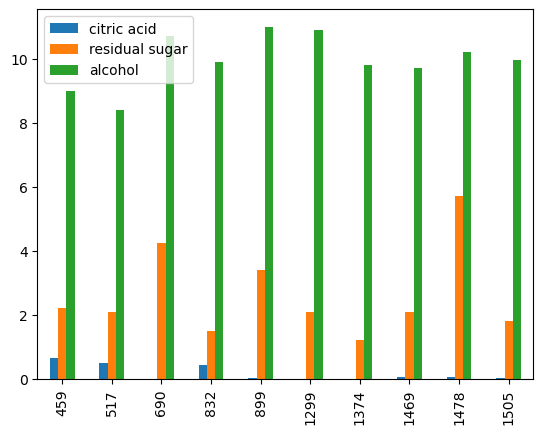

In [26]:
wineq3.plot(y=["citric acid", "residual sugar", "alcohol"], kind="bar", use_index =True)

In [17]:
wineq8 = redwine.loc[redwine['quality']==8]
wineq8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [18]:
# qualitygroup

array([<Axes: ylabel='residual sugar'>], dtype=object)

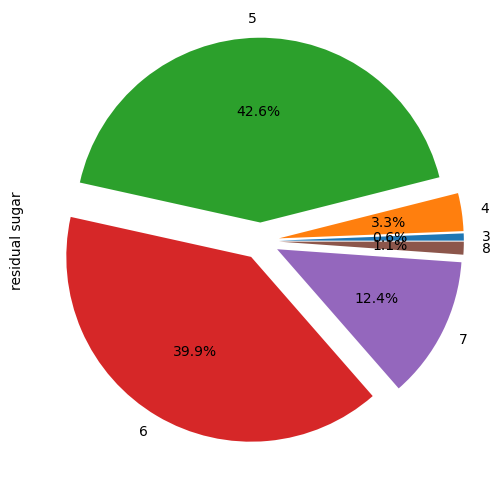

In [19]:
#I used residual sugar to help groupby the quality in order to create the pie chart 
qualitypie = qualityvsugar.plot.pie(y='quality',autopct='%1.1f%%', subplots=True,explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1), figsize=(11,6))
qualitypie

In [20]:
#For the pie chart above we can surmise a few things. A majority of the redwine are either standard (quality of 5) or
#slightly better than standard(quality of 6). With only 3.9% (combine value of quality of 3 and 4)that can be classified 
#as "bad" in quality. 

#This can be seen as a good thing in that production seems to be creating relatively decent to good wine. 
#Questions:
#1. Can the company or companies raise the quality of the wine to 7 and 8. So that a majority of the quality is relatively high
#2. What needs to change for quality to be achieved during production? 
#3. What can be done to maintain quality after shipping to customers or stores? 
#4. Is it neccessary to change production from the way it is now? 
#5. Would a majority of customers care or notice? 
#6. Who are the customers? 
#7. Is sugar content or sweetness of wine indicative of quality?

In [21]:
# plt.figure(figsize=(20,10))
#x = plt.subplot(122)
#qualitygroup.plot(kind='pie', y='quality',autopct='%1.1f%%',  startangle=90, shadow=False, labels=redwine['quality'], legend = False, fontsize=12)